## Hierarchal Clustering

![alt text](images/4_02hierarchy-dendrogram.png)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

from sklearn.cluster import KMeans

In [2]:
wine = pd.read_csv('data/wine.csv', header=0)

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                            178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
mergings = linkage(wine, method='complete')

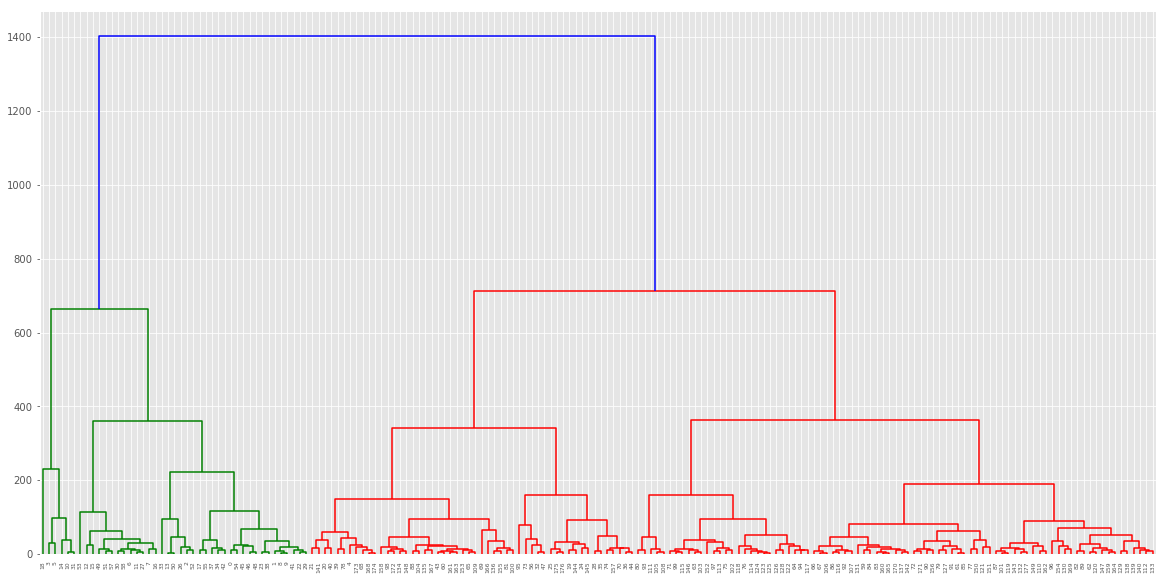

In [5]:
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

In [17]:
labels = fcluster(mergings, 700, criterion='distance')

In [18]:
labels = pd.DataFrame(labels)
labels.columns = ['label']

In [19]:
def winename(c):
    if c['Wine'] == 1:
        return "Borola"
    elif c['Wine'] == 2:
        return "Barbera"
    else:
        return "Grignolino"
        
        
wine['WineName'] = wine.apply(winename, axis=1)

In [20]:
result = pd.concat([labels, wine], axis=1, join='inner')

In [21]:
result.head()

label  Wine  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0      1     1    14.23        1.71  2.43                 15.6        127   
1      1     1    13.20        1.78  2.14                 11.2        100   
2      1     1    13.16        2.36  2.67                 18.6        101   
3      1     1    14.37        1.95  2.50                 16.8        113   
4      2     1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              \
0             5.64  1.04                          3.92                 1065   
1             4.38  1.05                          3.40                 1050   
2             5.68  1.03                          3.17                 1185   
3             7.80  0.86                          3.45                 1480   
4             4.32  1.04                          2.93                  735   

  WineName  
0   Borola  
1   Borola  
2   Borola  
3   Borola  
4   Borola

In [22]:
ct = pd.crosstab(result['label'], result['WineName'])
ct  ##Notice label 1 and 2.  Watch what happens when we go to 3 clusters.

WineName  Barbera  Borola  Grignolino
label                                
1               0      43           0
2              15      16          21
3              56       0          27

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.figure(figsize=(20,10))

In [24]:
wine_cluster = pd.read_csv('data/wine.csv', header=0)
scaler.fit(wine_cluster)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
wine_scaled = scaler.transform(wine_cluster)
mergings_scale = linkage(wine_scaled, method='complete')

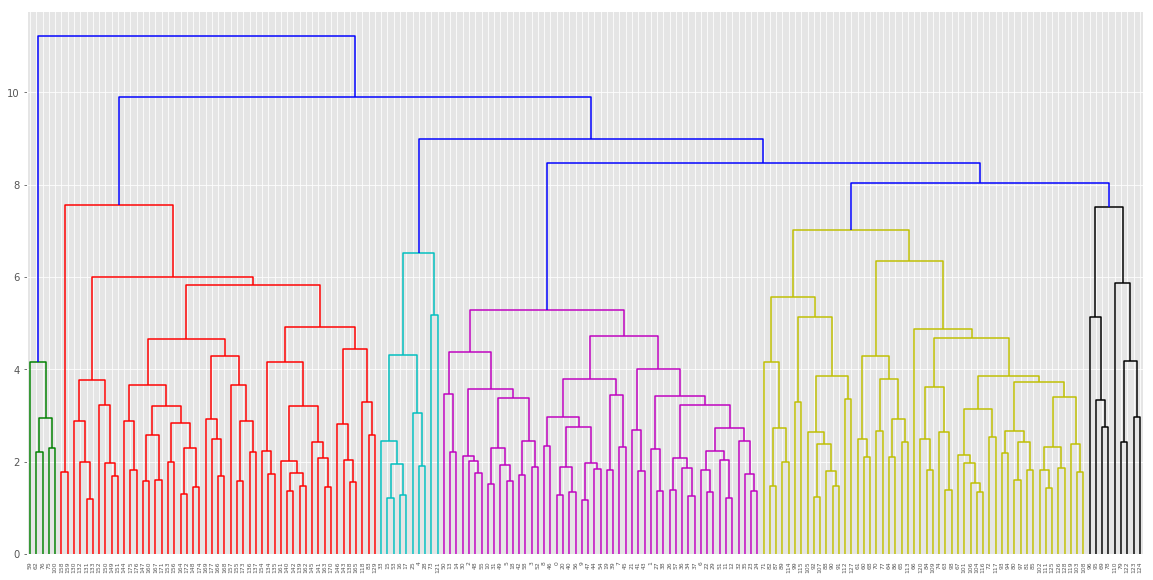

In [16]:
dendrogram(mergings_scale, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Using 9


In [26]:
labels_scale = fcluster(mergings_scale, 9, criterion='distance')

In [27]:
labels_scale = pd.DataFrame(labels_scale)
labels_scale.columns = ['label_s']

In [28]:
result_s = pd.concat([labels_scale, wine], axis=1, join='inner')

In [29]:
ct_s = pd.crosstab(result_s['label_s'], result_s['WineName'])
ct_s

WineName  Barbera  Borola  Grignolino
label_s                              
1               5       0           0
2               3       0          48
3              63      59           0

### Using 7

In [30]:
labels_3 = fcluster(mergings_scale, 7, criterion='distance')

In [31]:
labels_3 = pd.DataFrame(labels_3)
labels_3.columns = ['label_3']

In [32]:
result_3 = pd.concat([labels_3, wine], axis=1, join='inner')

In [33]:
ct_3 = pd.crosstab(result_3['label_3'], result_3['WineName'])
ct_3

WineName  Barbera  Borola  Grignolino
label_3                              
1               5       0           0
2               0       0           2
3               3       0          46
4               2       8           0
5               0      51           0
6              15       0           0
7              37       0           0
8               4       0           0
9               5       0           0

## Removing a subset of the data

Sometimes it is helpful to look at some of the data - less some outliers.  Let's take a look at the data without 5 wines.

In [34]:
results_01 = result_3[result_3['label_3']!=1]

In [35]:
results_01.head()

label_3  Wine  Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  \
0        5     1    14.23        1.71  2.43                 15.6        127   
1        5     1    13.20        1.78  2.14                 11.2        100   
2        5     1    13.16        2.36  2.67                 18.6        101   
3        5     1    14.37        1.95  2.50                 16.8        113   
4        4     1    13.24        2.59  2.87                 21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline              \
0             5.64  1.04                          3.92                 1065   
1             4.38  1.05                          3.40                 1050   
2             5.68  1.03                          3.17                 1185   
3             7.80  0.86                          3.45                 1480   
4             4.32  1.04                          2.93                  735   

  WineName  
0   Borola  
1   Borola  
2   Borola  
3   Borola  
4   Borola

In [36]:
results_01 = results_01.drop(['label_3', 'WineName'], axis=1)

In [37]:
scaler.fit(results_01)
results_01_scaled = scaler.transform(results_01)
mergings_scale = linkage(results_01_scaled, method='complete')

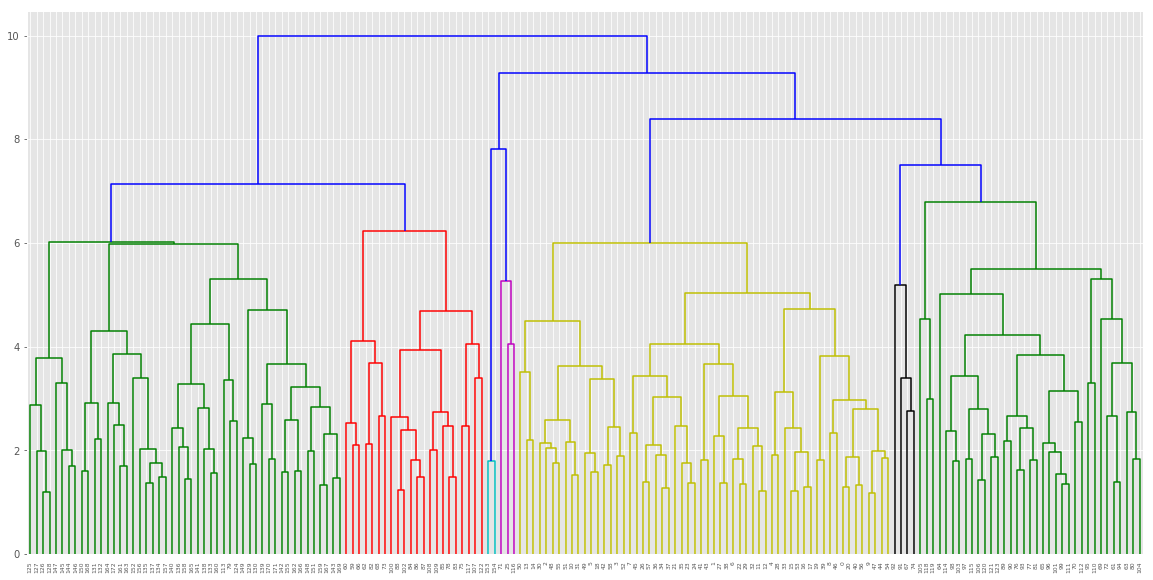

In [38]:
plt.figure(figsize=(20,10))
dendrogram(mergings_scale, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [43]:
labels_r01 = fcluster(mergings_scale, 9, criterion='distance')

In [44]:
labels_r01 = pd.DataFrame(labels_r01)
labels_r01.columns = ['label_r']

In [45]:
result_4 = pd.concat([labels_r01, wine], axis=1, join='inner')

In [46]:
ct_4 = pd.crosstab(result_4['label_r'], result_4['WineName'])
ct_4

WineName  Barbera  Borola  Grignolino
label_r                              
1              30       0          41
2               2       1           2
3              39      58           0